In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [35]:
import seaborn as sns

In [36]:
df=pd.read_excel('cases_malaysia.xlsx')

In [37]:
df.head()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.shape

(598, 11)

In [39]:
df.dtypes

date                       datetime64[ns]
cases_new                           int64
cases_import                        int64
cases_recovered                     int64
cluster_import                    float64
cluster_religious                 float64
cluster_community                 float64
cluster_highRisk                  float64
cluster_education                 float64
cluster_detentionCentre           float64
cluster_workplace                 float64
dtype: object

In [40]:
# check if any null value is present
df.isnull().values.any()

True

In [41]:
df.isnull().sum()

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

### Feature Engineering

##### Missing Values

In [45]:
df.columns

Index(['date', 'cases_new', 'cases_import', 'cases_recovered',
       'cluster_import', 'cluster_religious', 'cluster_community',
       'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre',
       'cluster_workplace'],
      dtype='object')

In [46]:
df.isnull().mean().sort_values(ascending=True)

date                       0.000000
cases_new                  0.000000
cases_import               0.000000
cases_recovered            0.000000
cluster_import             0.571906
cluster_religious          0.571906
cluster_community          0.571906
cluster_highRisk           0.571906
cluster_education          0.571906
cluster_detentionCentre    0.571906
cluster_workplace          0.571906
dtype: float64

#### Compute the frequency with every feature

<AxesSubplot:>

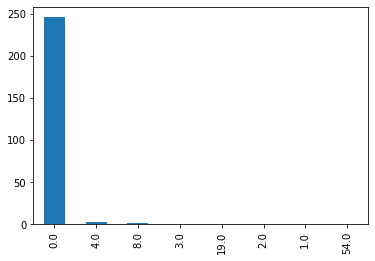

In [47]:
df['cluster_import'].value_counts().plot.bar()

<AxesSubplot:>

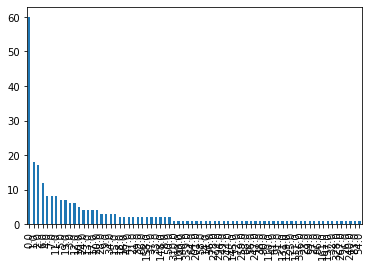

In [48]:
df['cluster_religious'].value_counts().plot.bar()

<AxesSubplot:>

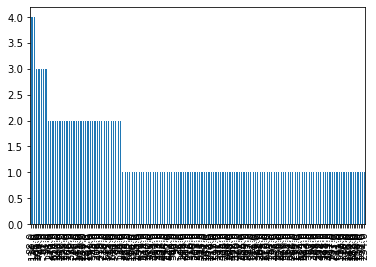

In [49]:
df['cluster_community'].value_counts().plot.bar()

<AxesSubplot:>

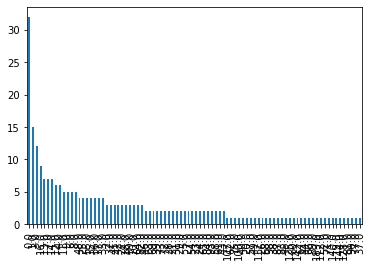

In [50]:
df['cluster_highRisk'].value_counts().plot.bar()

<AxesSubplot:>

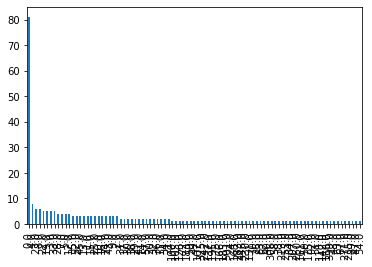

In [51]:
df['cluster_education'].value_counts().plot.bar()

<AxesSubplot:>

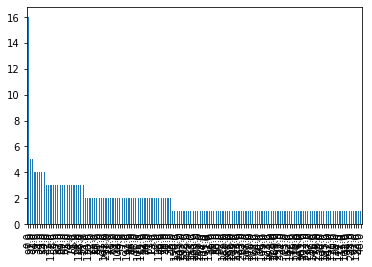

In [52]:
df['cluster_detentionCentre'].value_counts().plot.bar()

<AxesSubplot:>

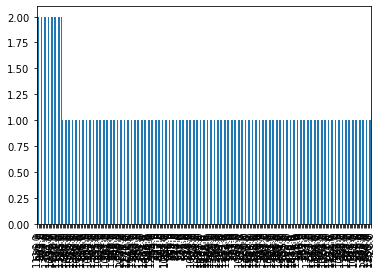

In [53]:
df['cluster_workplace'].value_counts().plot.bar()

In [54]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [55]:
for feature in ['cluster_import','cluster_religious','cluster_community','cluster_community','cluster_highRisk','cluster_education','cluster_detentionCentre','cluster_workplace']:
    impute_nan(df,feature)

In [56]:
df.isnull().mean()

date                       0.0
cases_new                  0.0
cases_import               0.0
cases_recovered            0.0
cluster_import             0.0
cluster_religious          0.0
cluster_community          0.0
cluster_highRisk           0.0
cluster_education          0.0
cluster_detentionCentre    0.0
cluster_workplace          0.0
dtype: float64

In [59]:
df.head()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
1,2020-01-26,0,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
2,2020-01-27,0,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
3,2020-01-28,0,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
4,2020-01-29,3,3,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0


In [60]:
dataset=df.drop(['date'], axis=1)

In [61]:
dataset.head()

,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,4,4,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
1,0,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
2,0,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
3,0,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
4,3,3,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0


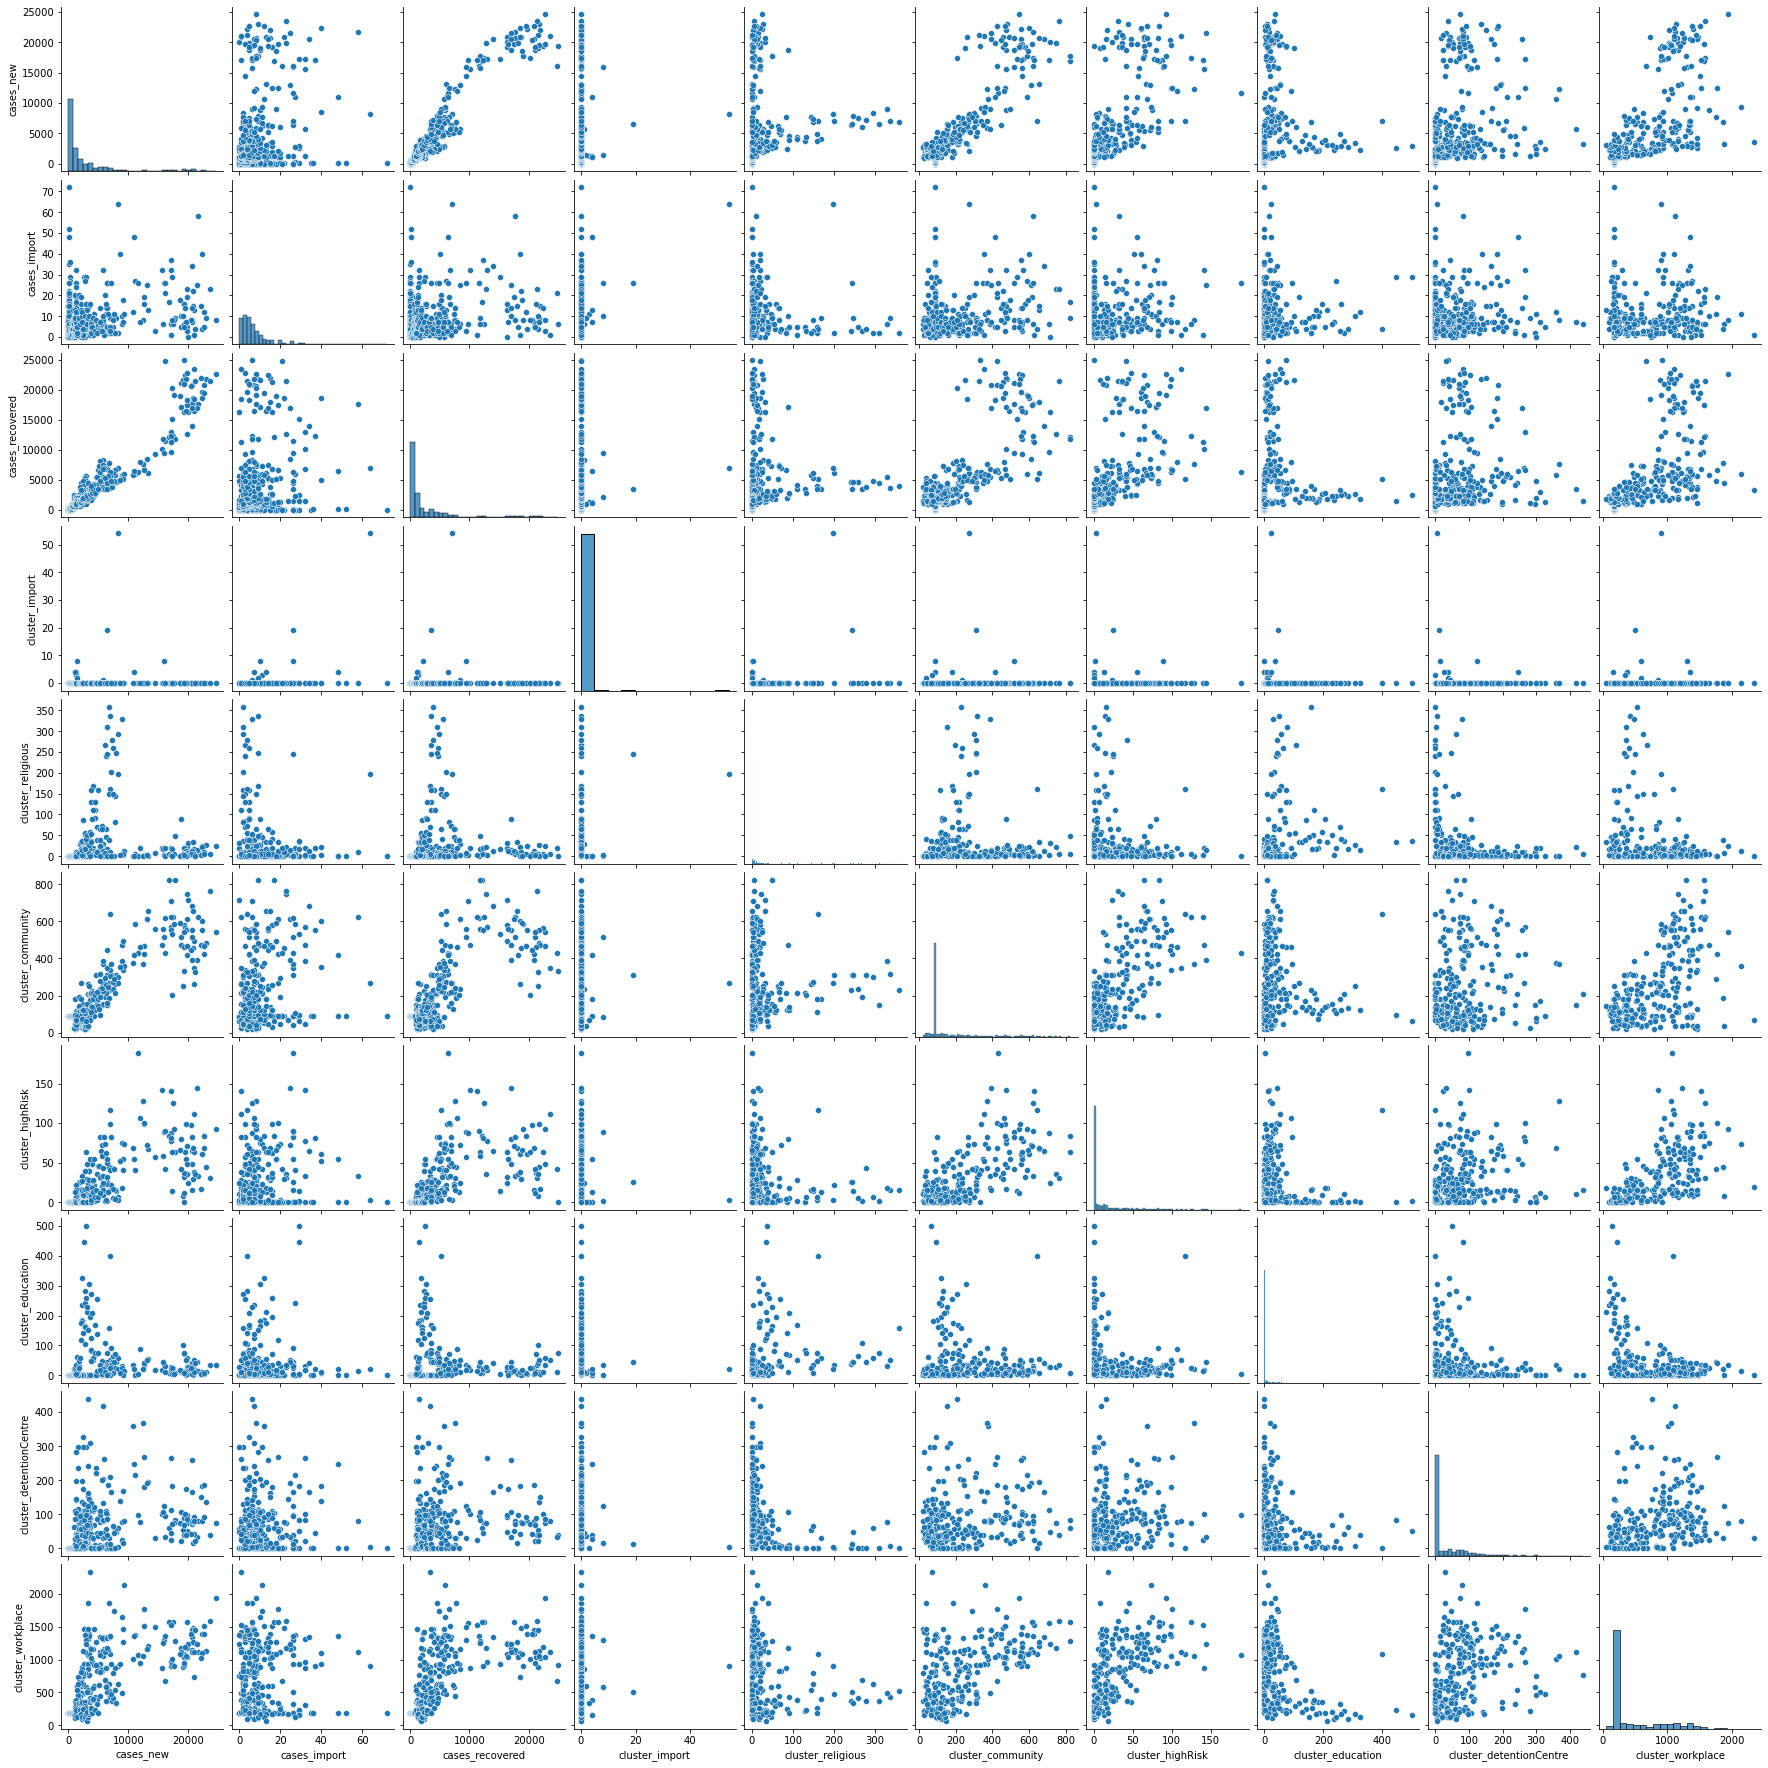

In [63]:
sns.pairplot(dataset)

In [62]:
dataset.corr()

,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
cases_new,1.000000,0.292477,0.963878,0.051362,0.195838,0.902685,0.750203,0.153701,0.443361,0.750618
cases_import,0.292477,1.000000,0.236830,0.296470,0.022653,0.330249,0.249744,0.137882,0.196598,0.205345
cases_recovered,0.963878,0.236830,1.000000,0.037628,0.139293,0.815319,0.676443,0.124331,0.393221,0.711809
cluster_import,0.051362,0.296470,0.037628,1.000000,0.212034,0.055632,0.007460,0.008460,-0.009025,0.056946
cluster_religious,0.195838,0.022653,0.139293,0.212034,1.000000,0.215343,0.088896,0.330975,-0.011473,0.081721
cluster_community,0.902685,0.330249,0.815319,0.055632,0.215343,1.000000,0.764152,0.161742,0.399452,0.691967
cluster_highRisk,0.750203,0.249744,0.676443,0.007460,0.088896,0.764152,1.000000,0.097245,0.442871,0.736432
cluster_education,0.153701,0.137882,0.124331,0.008460,0.330975,0.161742,0.097245,1.000000,0.048588,0.022705
cluster_detentionCentre,0.443361,0.196598,0.393221,-0.009025,-0.011473,0.399452,0.442871,0.048588,1.000000,0.568025
cluster_workplace,0.750618,0.205345,0.711809,0.056946,0.081721,0.691967,0.736432,0.022705,0.568025,1.000000


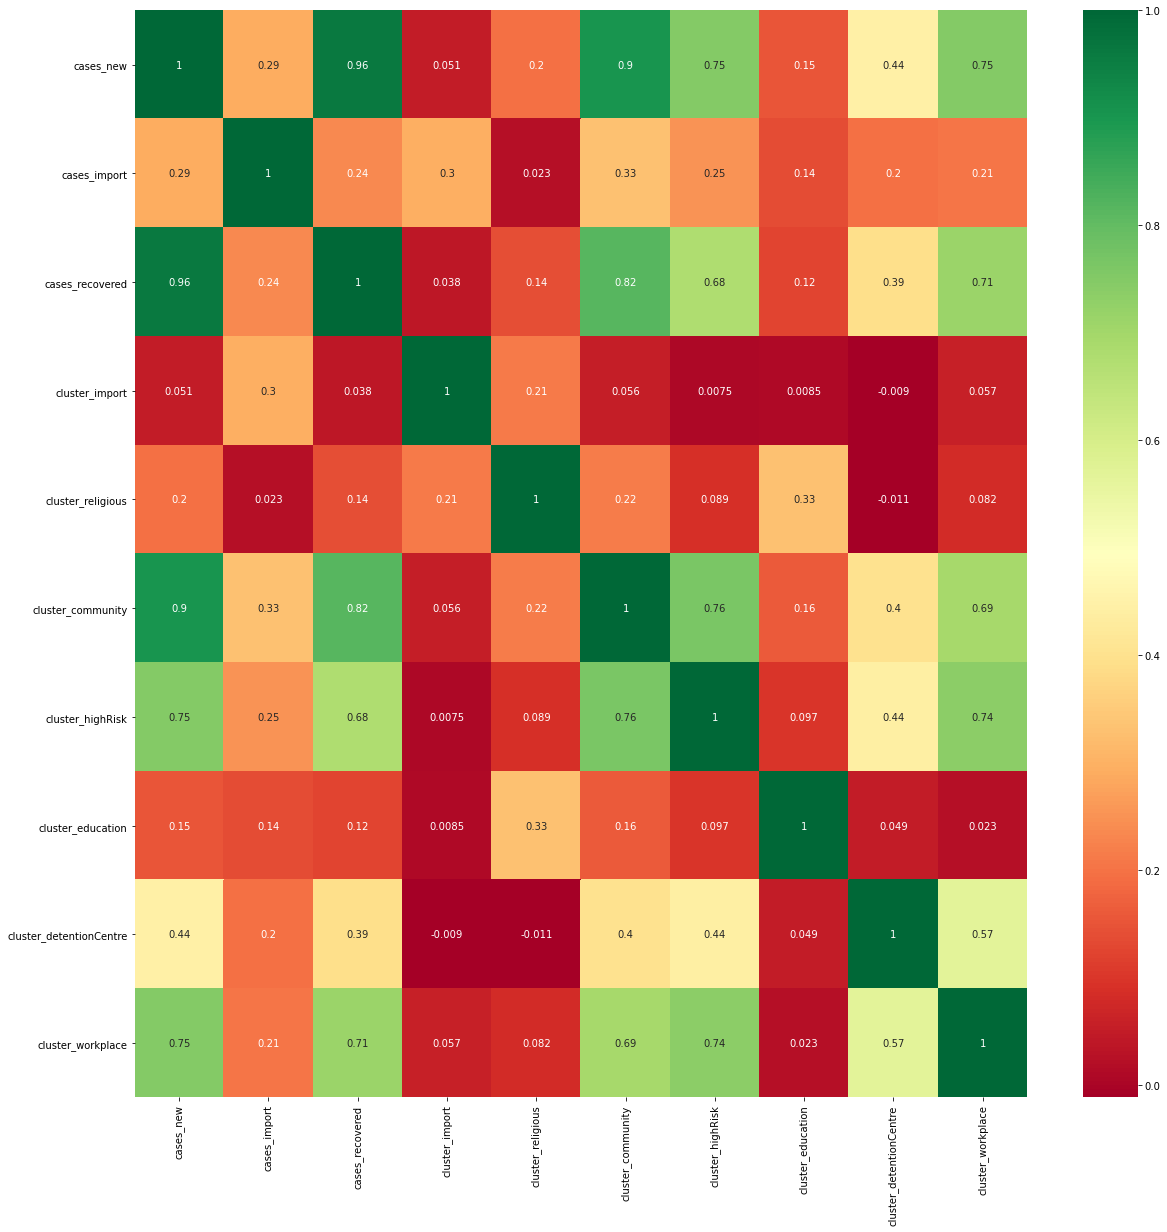

In [65]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Feature Selection

In [72]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [73]:
X['cluster_workplace'].unique()

array([ 181.,  671.,  882.,  432.,  518.,  590., 1463., 1403.,  935.,
        472.,  492.,  348.,  769.,  589.,  921., 1068., 1168.,  937.,
        854.,  513.,  966.,  346.,  538.,  595.,  537.,  505.,  414.,
       1170.,  564., 1116., 1337., 1349.,  917., 1089., 1465., 1268.,
        762., 1020., 1164., 1426.,  789., 1309., 1388., 1459., 1365.,
        627.,  497., 1372., 1302., 1118., 1230.,  743., 1870.,  824.,
        805., 2338.,  442.,  863.,  801., 1131.,  737.,  665.,  645.,
        813.,  428.,  454.,  232.,  357.,  587.,  399.,  244.,  270.,
        209.,  238.,  247.,  377.,  195.,  326.,  343.,  361.,  592.,
        385.,  207.,  300.,  243.,  223.,  155.,  213.,  540.,  330.,
        624.,  254.,  116.,  176.,  156.,  186.,  241.,  131.,  339.,
        236.,  342.,  235.,  332.,  227.,  179.,  356.,  171.,   95.,
        120.,  152.,   97.,  128.,  349.,  287.,  256.,   57.,  127.,
        217.,  166.,  172.,  245.,  199.,  204.,  360.,  376.,  433.,
        378.,  210.,

In [74]:
X.head()

,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,4,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
1,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
2,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
3,0,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0
4,3,0,0.0,0.0,88.0,0.0,0.0,0.0,181.0


In [75]:
y.head()

0    4
1    0
2    0
3    0
4    3
Name: cases_new, dtype: int64

In [70]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [76]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [77]:
print(model.feature_importances_)

[2.18461929e-03 5.80629302e-01 3.00076950e-04 6.81774691e-03
 2.93466146e-01 3.61566289e-02 3.40584883e-03 4.83847605e-03
 7.22011548e-02]


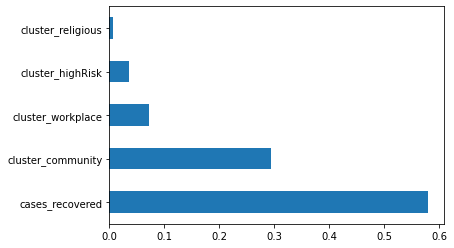

In [78]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
regressor=RandomForestRegressor()

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [85]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [87]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [88]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [90]:
rf_random.best_score_

-1042492.9948157392

In [91]:
predictions=rf_random.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cases_new', ylabel='Density'>

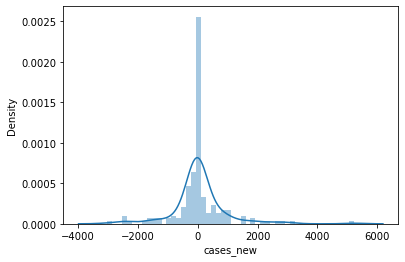

In [92]:
sns.distplot(y_test-predictions)

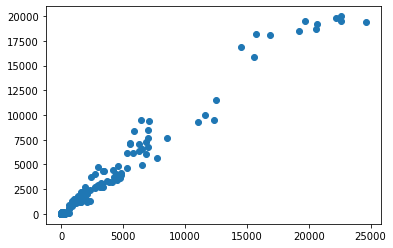

In [93]:
plt.scatter(y_test,predictions)